# Bigmart Sales Data Set

Retail is another industry which extensively uses analytics to optimize business processes. Tasks like product placement, inventory management, customized offers, product bundling, etc. are being smartly handled using data science techniques. As the name suggests, this data comprises of transaction records of a sales store. This is a regression problem. The data has 8523 rows of 12 variables.

<b>Problem</b>: Predict the sales of a store.

In [256]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [257]:
dataset =  pd.read_csv('Train_UWu5bXk.csv')

In [258]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [259]:
dataset.apply(lambda x:sum(x.isnull()),axis=0)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [260]:
pd.crosstab(dataset['Outlet_Type'],dataset['Outlet_Size'])

Outlet_Size,High,Medium,Small
Outlet_Type,,,
Grocery Store,0,0,528
Supermarket Type1,932,930,1860
Supermarket Type2,0,928,0
Supermarket Type3,0,935,0


In [261]:
dataset.loc[(dataset['Outlet_Type']=='Grocery Store') & (dataset['Outlet_Size'].isnull()),'Outlet_Size'] = 'Small'

In [262]:
pd.crosstab(dataset['Outlet_Type'],dataset['Outlet_Size'])

Outlet_Size,High,Medium,Small
Outlet_Type,,,
Grocery Store,0,0,1083
Supermarket Type1,932,930,1860
Supermarket Type2,0,928,0
Supermarket Type3,0,935,0


In [263]:
dataset.groupby('Outlet_Type')['Outlet_Size'].value_counts().unstack()

Outlet_Size,High,Medium,Small
Outlet_Type,,,
Grocery Store,NaN,NaN,1083.0
Supermarket Type1,932.0,930.0,1860.0
Supermarket Type2,NaN,928.0,NaN
Supermarket Type3,NaN,935.0,NaN


In [264]:
dataset.loc[(dataset['Outlet_Type'] == 'Supermarket Type1') & (dataset['Outlet_Size'].isnull()),'Outlet_Size'] = 'Small'

In [265]:
dataset.apply(lambda x:sum(x.isnull()),axis=0)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [266]:
dataset.loc[(dataset['Item_Fat_Content']=='LF'),'Item_Fat_Content'] = 'Low Fat'
dataset.loc[(dataset['Item_Fat_Content']=='low fat'),'Item_Fat_Content'] = 'Low Fat'
dataset.loc[(dataset['Item_Fat_Content']=='reg'),'Item_Fat_Content'] = 'Regular'

In [267]:
dataset.groupby(['Item_Type','Item_Fat_Content'])['Item_Weight'].mean().reset_index()

,Item_Type,Item_Fat_Content,Item_Weight
0,Baking Goods,Low Fat,12.552996
1,Baking Goods,Regular,12.013303
2,Breads,Low Fat,12.429912
3,Breads,Regular,10.002143
4,Breakfast,Low Fat,11.849412
5,Breakfast,Regular,13.336182
6,Canned,Low Fat,11.864650
7,Canned,Regular,12.804289
8,Dairy,Low Fat,13.391497
9,Dairy,Regular,13.483797


In [268]:
Item_Types = dataset['Item_Type'].unique()
for item_type in Item_Types:
    for fat_con in ['Regular','Low Fat']:
        mean_weight = dataset[(dataset['Item_Weight'].notnull())&
                             (dataset['Item_Type'] == item_type)&
                             (dataset['Item_Fat_Content'] == fat_con)]['Item_Weight'].mean()
        if np.isnan(mean_weight):
            continue
        dataset.loc[(dataset['Item_Weight'].isnull())&
               (dataset['Item_Type']==item_type)&
               (dataset['Item_Fat_Content'] == fat_con),'Item_Weight'] = mean_weight

In [198]:
#dataset['MRP_per_weight'] = dataset['Item_MRP']/dataset['Item_Weight']

In [201]:
#update_val = dataset[(dataset['Item_Weight']).notnull() 
#                     & (dataset['Item_Type']=='Baking Goods')
#                    & (dataset['Item_Fat_Content']=='Regular')]['MRP_per_weight'].mean()
#MRP = dataset[(dataset['Item_Weight']).isnull()
#              & (dataset['Item_Type']=='Baking Goods')
#              & (dataset['Item_Fat_Content']=='Regular')]['Item_MRP']
#print('update_val',update_val)
#print('MRP',MRP)
#print('MRP/np.asscalar(update_val.values)', MRP/np.asscalar(update_val.values))


update_val 12.593150889707434


In [202]:
#Item_Types = dataset['Item_Type'].unique()
#for item_type in Item_Types:
#    for fat_con in ['Regular','Low Fat']:
#        Mean_MRP_per_weight = dataset[(dataset['Item_Weight']).notnull() 
#                                      & (dataset['Item_Type']==item_type)
#                                      & (dataset['Item_Fat_Content']==fat_con)]['MRP_per_weight'].mean()
#        #print(Mean_MRP_per_weight)
#        if np.isnan(Mean_MRP_per_weight):
#            continue
#        MRP = dataset[(dataset['Item_Weight']).isnull()
#                      & (dataset['Item_Type']==item_type)
#                      & (dataset['Item_Fat_Content']==fat_con)]['Item_MRP']
#        
#        dataset.loc[(dataset['Item_Weight']).isnull()
#                    & (dataset['Item_Type']==item_type)
#                    & (dataset['Item_Fat_Content']==fat_con),'Item_Weight'] = MRP/Mean_MRP_per_weight

In [270]:
#dataset = dataset.drop(columns=['MRP_per_weight'])

In [271]:
dataset.apply(lambda x:sum(x.isnull()),axis=0)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [272]:
#writer = pd.ExcelWriter('output.xlsx')
#dataset.to_excel(writer,'Sheet1')
#writer.save()

In [273]:
dataset['Outlet_Establishment_Year'].max()

2009

In [274]:
dataset['outlet_age'] = dataset['Outlet_Establishment_Year'].max() - dataset['Outlet_Establishment_Year']
dataset.apply(lambda x:sum(x.isnull()),axis=0)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
outlet_age                   0
dtype: int64

In [275]:
dataset = dataset[['Item_Identifier','Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP',
                  'Outlet_Identifier','outlet_age','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Outlet_Sales']]

In [276]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,outlet_age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,10,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,0,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,10,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,11,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,22,High,Tier 3,Supermarket Type1,994.7052


In [277]:
writer = pd.ExcelWriter('output1a.xlsx')
dataset.to_excel(writer,'Sheet1')
writer.save()

In [211]:
dataset.sort_values(['Item_Outlet_Sales'],ascending=False).head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,outlet_age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7188,NCE42,17.745720,Low Fat,0.010551,Household,234.9958,OUT027,24,Medium,Tier 3,Supermarket Type3,13086.9648
5223,FDQ19,18.565700,Regular,0.014296,Fruits and Vegetables,242.6512,OUT027,24,Medium,Tier 3,Supermarket Type3,12117.5600
1450,FDZ20,20.534723,Low Fat,0.000000,Fruits and Vegetables,253.0356,OUT027,24,Medium,Tier 3,Supermarket Type3,11445.1020
4349,FDP33,19.686713,Low Fat,0.088840,Snack Foods,254.2672,OUT027,24,Medium,Tier 3,Supermarket Type3,10993.6896
6541,FDI50,17.323221,Regular,0.030693,Canned,228.0352,OUT027,24,Medium,Tier 3,Supermarket Type3,10306.5840


what are the top selling item?
   <br>accross stores
   <br>per stores
   <br> accross Item_type
   <br> per item_type
   
<br>How does Item_visibility impacts item sales
<br>What are the top sellers in stores
    <br> per location type
    <br>per size type
<br> does store age plays any role in the sales

In [212]:
dataset.groupby('Item_Identifier')['Item_Outlet_Sales'].sum().reset_index().sort_values('Item_Outlet_Sales',
                                                                                        ascending=False).head(10)

,Item_Identifier,Item_Outlet_Sales
1210,FDY55,42661.8008
156,FDA15,41584.5364
1230,FDZ20,40185.0248
359,FDF05,36555.7490
148,FDA04,35741.4756
544,FDK03,34843.9772
1454,NCQ06,34680.1904
1464,NCQ53,34508.4140
538,FDJ55,33531.0196
305,FDD44,32723.4042


In [213]:
idx = dataset['Item_Outlet_Sales'] == dataset.groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].transform(max)
dataset[idx][['Outlet_Identifier','Item_Identifier','Item_Outlet_Sales']].sort_values('Item_Outlet_Sales',ascending=False)

,Outlet_Identifier,Item_Identifier,Item_Outlet_Sales
7188,OUT027,NCE42,13086.9648
4888,OUT013,FDF39,10256.6490
4289,OUT046,NCM05,9779.9362
4961,OUT017,FDK03,9664.7528
8039,OUT045,FDY55,8994.9580
5752,OUT035,FDI15,8479.6288
1506,OUT049,FDB15,7646.0472
43,OUT018,FDC02,6768.5228
7759,OUT010,NCK30,1775.6886
8353,OUT019,NCX41,1482.0708


In [214]:
dataset.groupby('Item_Type')['Item_Outlet_Sales'].sum().reset_index().sort_values('Item_Outlet_Sales',
                                                                                 ascending=False).head(10)

,Item_Type,Item_Outlet_Sales
6,Fruits and Vegetables,2.820060e+06
13,Snack Foods,2.732786e+06
9,Household,2.055494e+06
5,Frozen Foods,1.825735e+06
4,Dairy,1.522594e+06
3,Canned,1.444151e+06
0,Baking Goods,1.265525e+06
8,Health and Hygiene,1.045200e+06
10,Meat,9.175656e+05
14,Soft Drinks,8.928977e+05


In [215]:
dataset['item_outlet_sales_vol'] = dataset['Item_Outlet_Sales']/dataset['Item_MRP']
dataset.groupby('Item_Type')['item_outlet_sales_vol'].sum().reset_index().sort_values('item_outlet_sales_vol',
                                                                                     ascending=False).head(10)

,Item_Type,item_outlet_sales_vol
6,Fruits and Vegetables,19331.405072
13,Snack Foods,18718.673869
9,Household,13836.714613
5,Frozen Foods,12936.582569
3,Canned,10338.636977
4,Dairy,10121.445515
0,Baking Goods,9943.687764
8,Health and Hygiene,8057.552691
14,Soft Drinks,6861.378368
10,Meat,6553.540510


In [216]:
dataset = dataset.drop(columns='item_outlet_sales_vol')

In [217]:
idx = dataset['Item_Outlet_Sales'] == dataset.groupby(['Item_Type'])['Item_Outlet_Sales'].transform(max)
dataset[idx][['Item_Type','Item_Identifier','Item_Outlet_Sales']].sort_values('Item_Outlet_Sales',
                                                                             ascending=False).head(10)

,Item_Type,Item_Identifier,Item_Outlet_Sales
7188,Household,NCE42,13086.9648
5223,Fruits and Vegetables,FDQ19,12117.5600
4349,Snack Foods,FDP33,10993.6896
6541,Canned,FDI50,10306.5840
4888,Dairy,FDF39,10256.6490
4289,Health and Hygiene,NCM05,9779.9362
7752,Frozen Foods,FDC17,9678.0688
6606,Soft Drinks,DRF36,9554.2300
8201,Meat,FDO03,9390.4432
3757,Breads,FDR35,8958.3390


In [218]:
ds = dataset[['Item_Visibility','Item_Outlet_Sales']].sort_values('Item_Visibility', ascending=True)
ds.head()

,Item_Visibility,Item_Outlet_Sales
596,0.0,487.3656
5881,0.0,191.7504
3255,0.0,7247.2330
3257,0.0,890.8404
3259,0.0,1105.2280


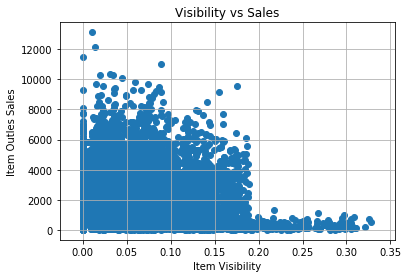

In [219]:
fig, ax = plt.subplots()
ax.scatter(ds['Item_Visibility'],ds['Item_Outlet_Sales'])
ax.set(xlabel='Item Visibility',ylabel='Item Outles Sales',title='Visibility vs Sales')
ax.grid()
plt.show()

In [220]:
ds = dataset[['outlet_age','Item_Outlet_Sales']].sort_values('outlet_age',ascending=True)
ds.head()

,outlet_age,Item_Outlet_Sales
5367,0,2596.6200
6382,0,2059.9852
3846,0,2348.9424
3844,0,383.5008
6386,0,303.6048


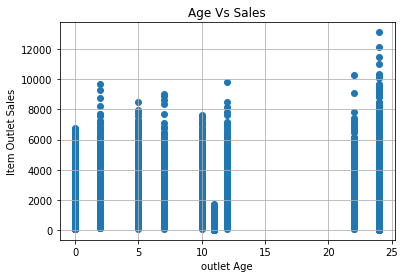

In [221]:
fig, ax = plt.subplots()
ax.scatter(ds['outlet_age'],ds['Item_Outlet_Sales'])
ax.set(xlabel='outlet Age',ylabel='Item Outlet Sales',title='Age Vs Sales')
ax.grid()
plt.show()

In [222]:
dataset.groupby('Outlet_Size')['Item_Outlet_Sales'].sum().reset_index().sort_values('Item_Outlet_Sales',
                                                                                   ascending=False).head()

,Outlet_Size,Item_Outlet_Sales
2,Small,8.958743e+06
1,Medium,7.489719e+06
0,High,2.142664e+06


In [223]:
idx = dataset['Item_Outlet_Sales'] == dataset.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].transform(max)
dataset[idx][['Outlet_Location_Type','Item_Identifier','Item_Outlet_Sales']].sort_values('Item_Outlet_Sales',
                                                                                         ascending=False).head()

,Outlet_Location_Type,Item_Identifier,Item_Outlet_Sales
7188,Tier 3,NCE42,13086.9648
4289,Tier 1,NCM05,9779.9362
4961,Tier 2,FDK03,9664.7528


In [224]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,outlet_age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,10,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,0,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,10,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,11,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,22,High,Tier 3,Supermarket Type1,994.7052


In [225]:
dataset = dataset.drop(columns=['Item_Identifier','Outlet_Identifier'])
dataset.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,outlet_age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,10,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,0,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,10,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,11,Small,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,22,High,Tier 3,Supermarket Type1,994.7052


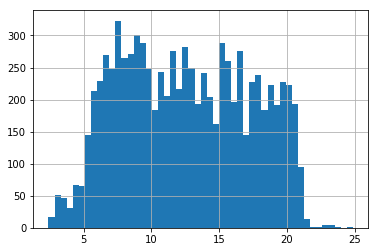

In [226]:
dataset['Item_Weight'].hist(bins=50)

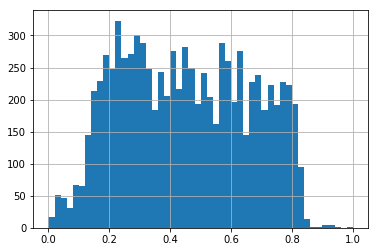

In [227]:
max_weight = dataset['Item_Weight'].max()
min_weight = dataset['Item_Weight'].min()
dataset['Item_Weight'] = (dataset['Item_Weight']- min_weight)/(max_weight-min_weight)
dataset['Item_Weight'].hist(bins=50)

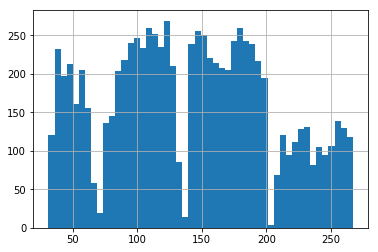

In [228]:
dataset['Item_MRP'].hist(bins=50)

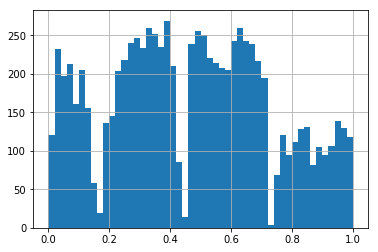

In [229]:
max_mrp = dataset['Item_MRP'].max()
min_mrp = dataset['Item_MRP'].min()
dataset['Item_MRP'] = (dataset['Item_MRP']-min_mrp)/(max_mrp-min_mrp)
dataset['Item_MRP'].hist(bins=50)

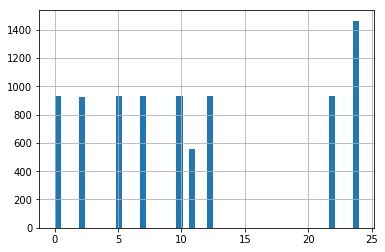

In [230]:
dataset['outlet_age'].hist(bins=50)

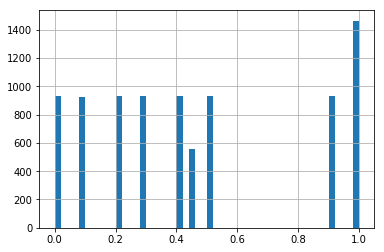

In [231]:
max_age = dataset['outlet_age'].max()
min_age = dataset['outlet_age'].min()
dataset['outlet_age'] = (dataset['outlet_age']-min_age)/(max_age-min_age)
dataset['outlet_age'].hist(bins=50)

In [232]:
dataset['Item_Fat_Content'] = dataset['Item_Fat_Content'].map({'Low Fat':0,'Regular':1})
item_type_dummy = pd.get_dummies(dataset['Item_Type'],prefix='item_type')
outlet_size_dummy = pd.get_dummies(dataset['Outlet_Size'],prefix='Outlet_Size')
outlet_loc_dummy = pd.get_dummies(dataset['Outlet_Location_Type'],prefix='Outlet_Location_Type')
outlet_type_dummy = pd.get_dummies(dataset['Outlet_Type'],prefix='Outlet_Type')

In [233]:
dataset = pd.concat((dataset,item_type_dummy,outlet_size_dummy,outlet_loc_dummy,outlet_type_dummy),axis=1)
dataset.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,outlet_age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.307276,0,0.016047,Dairy,0.927507,0.416667,Medium,Tier 1,Supermarket Type1,3735.1380,...,0,1,0,1,0,0,0,1,0,0
1,0.156888,1,0.019278,Soft Drinks,0.072068,0.000000,Medium,Tier 3,Supermarket Type2,443.4228,...,0,1,0,0,0,1,0,0,1,0
2,0.672122,0,0.016760,Meat,0.468288,0.416667,Medium,Tier 1,Supermarket Type1,2097.2700,...,0,1,0,1,0,0,0,1,0,0
3,0.747761,1,0.000000,Fruits and Vegetables,0.640093,0.458333,Small,Tier 3,Grocery Store,732.3800,...,0,0,1,0,0,1,1,0,0,0
4,0.290813,0,0.000000,Household,0.095805,0.916667,High,Tier 3,Supermarket Type1,994.7052,...,1,0,0,0,0,1,0,1,0,0


In [234]:
#writter = pd.ExcelWriter('output2.xlsx')
#dataset.to_excel(writter,'Sheet1')
#writter.save()

In [236]:
dataset = dataset[['Item_Weight','Item_Fat_Content','Item_Visibility','item_type_Baking Goods','item_type_Breads',
                  'item_type_Breakfast','item_type_Canned','item_type_Dairy','item_type_Frozen Foods',
                  'item_type_Fruits and Vegetables','item_type_Hard Drinks','item_type_Health and Hygiene',
                 'item_type_Household','item_type_Meat','item_type_Others','item_type_Seafood','item_type_Snack Foods',
                 'item_type_Soft Drinks','item_type_Starchy Foods','Item_MRP','outlet_age','Outlet_Size_High',
                 'Outlet_Size_Medium','Outlet_Size_Small','Outlet_Location_Type_Tier 1','Outlet_Location_Type_Tier 2',
                 'Outlet_Location_Type_Tier 3','Outlet_Type_Grocery Store','Outlet_Type_Supermarket Type1',
                 'Outlet_Type_Supermarket Type2','Outlet_Type_Supermarket Type3','Item_Outlet_Sales']]

In [237]:
writter = pd.csvwriter('output3.xlsx')
dataset.to_excel(writter,'Sheet1')
writter.save()